In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ADAM

Funciones de costo

In [19]:
def grad_exp(theta, f_params):
    '''
    Gradiente de la funcion de costo 
           sum_i 1-exp(-k(theta@x[i]-y[i])**2)
    '''
    kappa= f_params['kappa']
    X    = f_params['X']
    y    = f_params['y']
    err=theta[0]*X+theta[1]-y
    partial0=err*np.exp(-kappa*err**2)
    partial1=X*partial0
    gradient= np.concatenate((partial1, partial0), axis=1)
    return np.mean(gradient, axis=0)

In [20]:
def ADAM(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable con Momentum(A DAM) 
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                      eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                 de descenso (0,1)
                      eta2     = gd_params['eta2'] factor de momentum para la el 
                                 tamaño de paso (0,1)
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon= 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    p        = np.zeros(theta.shape)
    v        = 0.0
    Theta    = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        g  = grad(theta, f_params=f_params)
        p  = eta1*p + (1.0-eta1)*g
        v  = eta2*v + (1.0-eta2)*(g**2)
        p_hat = p/(1.-eta1_t)
        v_hat = v/(1.-eta2_t)
        theta = theta - alpha * p_hat / (np.sqrt(v_hat)+epsilon)
        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta)
    return np.array(Theta)

Generacion de datos

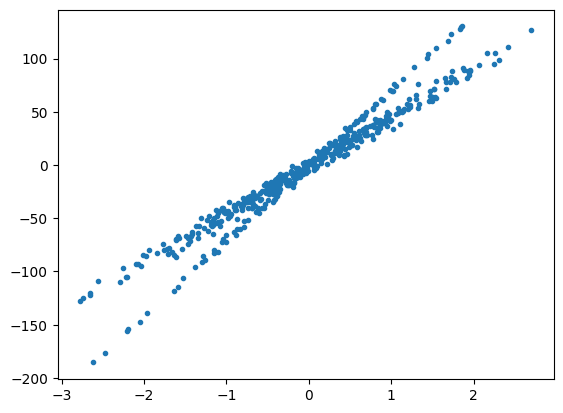

In [21]:
from sklearn import datasets

n_samples = 500
X, y = datasets.make_regression(n_samples=n_samples,
                                n_features=1,
                                n_informative=2, 
                                noise=5,
                                random_state=0) #2)
n_outliers=100
X[:n_outliers], y[:n_outliers] = datasets.make_regression(n_samples=n_outliers,
                                n_features=1,
                                n_informative=2, 
                                noise=2,
                                random_state=61)
y=np.expand_dims(y,axis=1)
plt.scatter(X[:],y[:], marker='.')

# condición inicial
theta=10*np.random.normal(size=2)

# parámetros del algoritmo
gd_params = {'alpha'          : 0.95, 
             'alphaADADELTA'  : 0.7,
             'alphaADAM'      : 0.95,
             'nIter'          : 300,
             'batch_size'     : 100,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999}

# parámetros de la función objetivo
f_params={'kappa' : 0.01, 
          'X'     : X , 
          'y'     : y}

Ajuste de la recta

In [22]:
ThetaADAM = ADAM(theta=theta, grad=grad_exp, gd_params=gd_params, f_params=f_params)

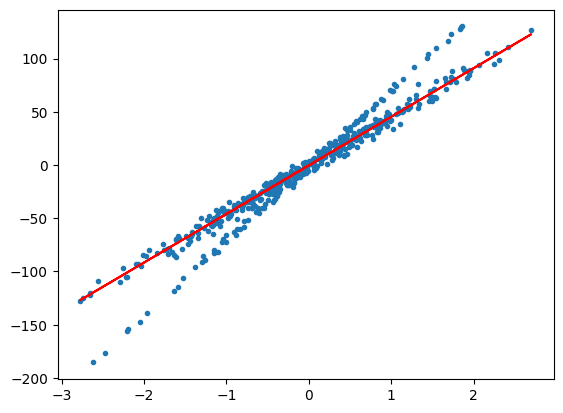

In [23]:
plt.scatter(X[:],y[:], marker='.')
plt.plot(X, ThetaADAM[-1][0]*X+ThetaADAM[-1][1], color='red')
plt.show()

# ADAMW

In [24]:
def ADAMW(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable con Momentum(A DAM) 
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                      eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                 de descenso (0,1)
                      eta2     = gd_params['eta2'] factor de momentum para la el 
                                 tamaño de paso (0,1)
                      decay    = gd_params['decay'] factor de decaimiento para el tamaño de paso
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon= 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    decay    = gd_params['decay']
    p        = np.zeros(theta.shape)
    v        = 0.0
    Theta    = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        g  = grad(theta, f_params=f_params)
        p  = eta1*p + (1.0-eta1)*g
        v  = eta2*v + (1.0-eta2)*(g**2)
        p_hat = p/(1.-eta1_t)
        v_hat = v/(1.-eta2_t)
        theta = (1 - alpha * decay) * theta - alpha * p_hat / (np.sqrt(v_hat)+epsilon)
        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta)
    return np.array(Theta)

In [25]:
# parámetros del algoritmo
gd_params = {'alpha'          : 0.95, 
             'alphaADADELTA'  : 0.7,
             'alphaADAM'      : 0.95,
             'nIter'          : 300,
             'batch_size'     : 100,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999,
             'decay'          : 0.01}

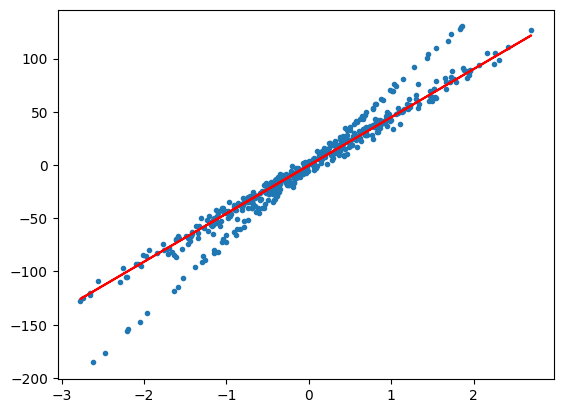

In [26]:
ThetaADAMW = ADAMW(theta=theta, grad=grad_exp, gd_params=gd_params, f_params=f_params)

plt.scatter(X[:],y[:], marker='.')
plt.plot(X, ThetaADAMW[-1][0]*X+ThetaADAMW[-1][1], color='red')
plt.show()

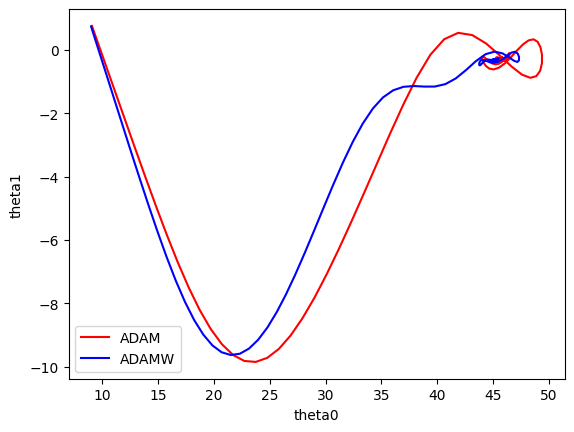

In [27]:
plt.plot(ThetaADAM[:,0], ThetaADAM[:,1], 'r-', label='ADAM')
plt.plot(ThetaADAMW[:,0], ThetaADAMW[:,1], 'b-', label='ADAMW')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.legend()
plt.show()

# Regresion logistica

Funciones de optimizacion

In [7]:
def SGD(theta, grad=None, gd_params={}, f_params={}):
    '''
    Descenso de gradiente estocástico
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      batch_size = gd_params['batch_size'] tamaño de la muestra
                      
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    (high, dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    
    nIter = gd_params['nIter']
    alpha = gd_params['alpha']
        
    Theta = []
    for t in range(nIter):
        smpIdx = np.random.randint(0, high)
        smpX = f_params['X'][smpIdx:smpIdx+1]
        smpy = f_params['y'][smpIdx:smpIdx+1]
        # parametros de la funcion objetivo
        smpf_params = {'kappa': f_params['kappa'], 
                       'X': smpX, 
                       'y': smpy}
        
        p = grad(theta, f_params=smpf_params)
        theta = theta - alpha * p
        Theta.append(theta.copy())
        
    return np.array(Theta)

def stochastic_NAG(theta, grad=None, gd_params={}, f_params={}):
    '''
    Descenso acelerado de Nesterov
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      eta   = gd_params['eta']  parametro de inercia (0,1]
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    (high, dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    p     = np.zeros(theta.shape)
    Theta = []
    
    for t in range(nIter):
        smpIdx = np.random.randint(0, high)
        smpX = f_params['X'][smpIdx:smpIdx+1]
        smpy = f_params['y'][smpIdx:smpIdx+1]
        # parametros de la funcion objetivo
        smpf_params = {'kappa': f_params['kappa'], 
                        'X': smpX, 
                        'y': smpy}
        
        pre_theta = theta - 2.0 * alpha * p
        g = grad(pre_theta, f_params=smpf_params)
        p = g + eta * p
        theta = theta - alpha * p
        Theta.append(theta.copy())
    return np.array(Theta)

def stochastic_ADAM(theta, grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable con Momentum (ADAM)
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                      eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                 de descenso (0,1)
                      eta2     = gd_params['eta2'] factor de momentum para la el 
                                 tamaño de paso (0,1)
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon = 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    (high, dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    p        = np.zeros(theta.shape)
    v        = np.zeros(theta.shape)
    Theta    = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        smpIdx = np.random.randint(0, high)
        smpX = f_params['X'][smpIdx:smpIdx+1]
        smpy = f_params['y'][smpIdx:smpIdx+1]
        # parametros de la funcion objetivo
        smpf_params = {'kappa': f_params['kappa'], 
                       'X': smpX, 
                       'y': smpy}
        
        g  = grad(theta, f_params=smpf_params)
        p  = eta1 * p + (1.0 - eta1) * g
        v  = eta2 * v + (1.0 - eta2) * (g**2)
        p_hat = p / (1. - eta1_t)
        v_hat = v / (1. - eta2_t)
        theta = theta - alpha * p_hat / (np.sqrt(v_hat) + epsilon)
        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta.copy())
    return np.array(Theta)

def stochastic_ADAMW(theta, grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable con Momentum y Decaimiento de Peso (ADAMW)
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                      eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                 de descenso (0,1)
                      eta2     = gd_params['eta2'] factor de momentum para la el 
                                 tamaño de paso (0,1)
                      decay    = gd_params['decay'] factor de decaimiento para el tamaño de paso
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon = 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    decay    = gd_params['decay']
    (high, dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    p        = np.zeros(theta.shape)
    v        = np.zeros(theta.shape)
    Theta    = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        smpIdx = np.random.randint(0, high)
        smpX = f_params['X'][smpIdx:smpIdx+1]
        smpy = f_params['y'][smpIdx:smpIdx+1]
        # parametros de la funcion objetivo
        smpf_params = {'kappa': f_params['kappa'], 
                       'X': smpX, 
                       'y': smpy}
        
        g  = grad(theta, f_params=smpf_params)
        p  = eta1 * p + (1.0 - eta1) * g
        v  = eta2 * v + (1.0 - eta2) * (g**2)
        p_hat = p / (1. - eta1_t)
        v_hat = v / (1. - eta2_t)
        theta = theta - alpha * (p_hat / (np.sqrt(v_hat) + epsilon) + decay * theta)

        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta.copy())
    return np.array(Theta)

Funciones de regresion logaritmica

In [13]:
def sigmoid(X, theta):
    return 1/(1+np.exp(-X@theta))

def log_likelihood(theta, X, y):
    phi = sigmoid(X, theta)
    epsilon = 1e-8
    return -(1/len(y)) * np.sum(y*np.log(phi+epsilon) + (1-y)*np.log(1-phi+epsilon))

def grad_log_likelihood(theta, f_params={}):
    X    = f_params['X']
    y    = f_params['y']
    phi = sigmoid(X, theta)
    return (1/len(y)) * X.T@(phi-y)

def logistic_regression(theta, gd_params={}, f_params={}, optimizer=None, g=grad_log_likelihood):
    X = f_params['X']
    y = f_params['y']

    return optimizer(theta=theta, grad=g, gd_params=gd_params, f_params=f_params)

Se normaliza la matriz de datos; por una tarea anterior (de otra clase), se sabe que las clases 1 y 2 se encuentran mas cerca entre si, por lo que se decide agruparlas dentro de una sola clase.

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target

#y[y==1] = 0
y[y==2] = 1


X = StandardScaler().fit_transform(X)
X = np.hstack([np.ones((X.shape[0], 1)), X])

Definicion de los parametros de la funcion y el algoritmo, y ejecucion del algoritmo para las cuatro funciones de optimizacion.

In [16]:
import numpy as np

# Definir los optimizadores
optimizers = {
    'SGD': SGD,
    'Nesterov': stochastic_NAG,
    'Adam': stochastic_ADAM,
    'AdamW': stochastic_ADAMW
}

# Parámetros para el algoritmo
gd_params = {'alpha'          : 0.1, 
             'alphaADADELTA'  : 0.7,
             'alphaADAM'      : 0.05,
             'nIter'          : 10000,
             'batch_size'     : 32,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999,
             'decay'          : 0.01}

# Parámetros para la función objetivo
f_params = {'kappa' : 0.01, 
            'X'     : X, 
            'y'     : y}

theta0 = np.random.randn(X.shape[1])
trajectories = {}
for name in optimizers:
    trajectories[name] = optimizers[name](theta=theta0, grad=grad_log_likelihood, gd_params=gd_params, f_params=f_params)

# Visualizacion

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

frames = []

# Definir pares de características
pairs = [(i, j) for i in range(1, X.shape[1]) for j in range(i + 1, X.shape[1])]  # Ignorar la columna de 1's

# Obtener los límites fijos para los ejes
x_min, x_max = X[:, 1:].min() - 0.5, X[:, 1:].max() + 0.5  # Ignorar la columna de 1's
y_min, y_max = X[:, 1:].min() - 0.5, X[:, 1:].max() + 0.5  # Ignorar la columna de 1's

# Crear una lista de frames para la animación
for frame in range(0, len(trajectories['SGD']), max(1, len(trajectories['SGD']) // 50)):  # Tomar 50 frames
    fig, axes = plt.subplots(len(pairs) // 3, 3, figsize=(15, 15))

    # Listas para almacenar handles y labels de la leyenda
    handles, labels = [], []

    for idx, (i, j) in enumerate(pairs):
        ax = axes[idx // 3, idx % 3]

        # Scatter plot para las clases
        scatter1 = ax.scatter(X[y == 0, i], X[y == 0, j], color='red', label='Setosa' if idx == 0 else "")
        scatter2 = ax.scatter(X[y == 1, i], X[y == 1, j], color='blue', label='Versicolor y Virginica' if idx == 0 else "")

        # Frontera de decisión para cada optimizador
        for name in optimizers:
            theta = trajectories[name][frame]
            x_vals = np.linspace(x_min, x_max, 100)
            y_vals = -(theta[0] + theta[i] * x_vals) / (theta[j] + 1e-6)  # Línea de decisión
            line, = ax.plot(x_vals, y_vals, label=name if idx == 0 else "")

            # Guardar handles y labels para la leyenda (solo una vez)
            if idx == 0:
                handles.append(line)
                labels.append(name)

        # Configurar ejes
        ax.set_xlabel(f'Feature {i}')
        ax.set_ylabel(f'Feature {j}')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

    # Añadir handles y labels de los scatter plots a la leyenda (solo una vez)
    
    handles.extend([scatter1, scatter2])
    labels.extend(['Setosa', 'Versicolor y Virginica'])

    # Añadir una única leyenda fuera de las gráficas
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.5), ncol=len(handles))

    plt.tight_layout()

    # Convertir la figura en una imagen
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())
    frames.append(Image.fromarray(img))
    plt.close(fig)

# Guardar la animación como GIF
frames[0].save(f"animation.gif", save_all=True, append_images=frames[1:], duration=50, loop=0)

Se muestra la animacion de la actualizacion de los parametros durante el algoritmo, donde se observan buenos resultados en todos los pares de caracteristicas excepto en las primeras dos

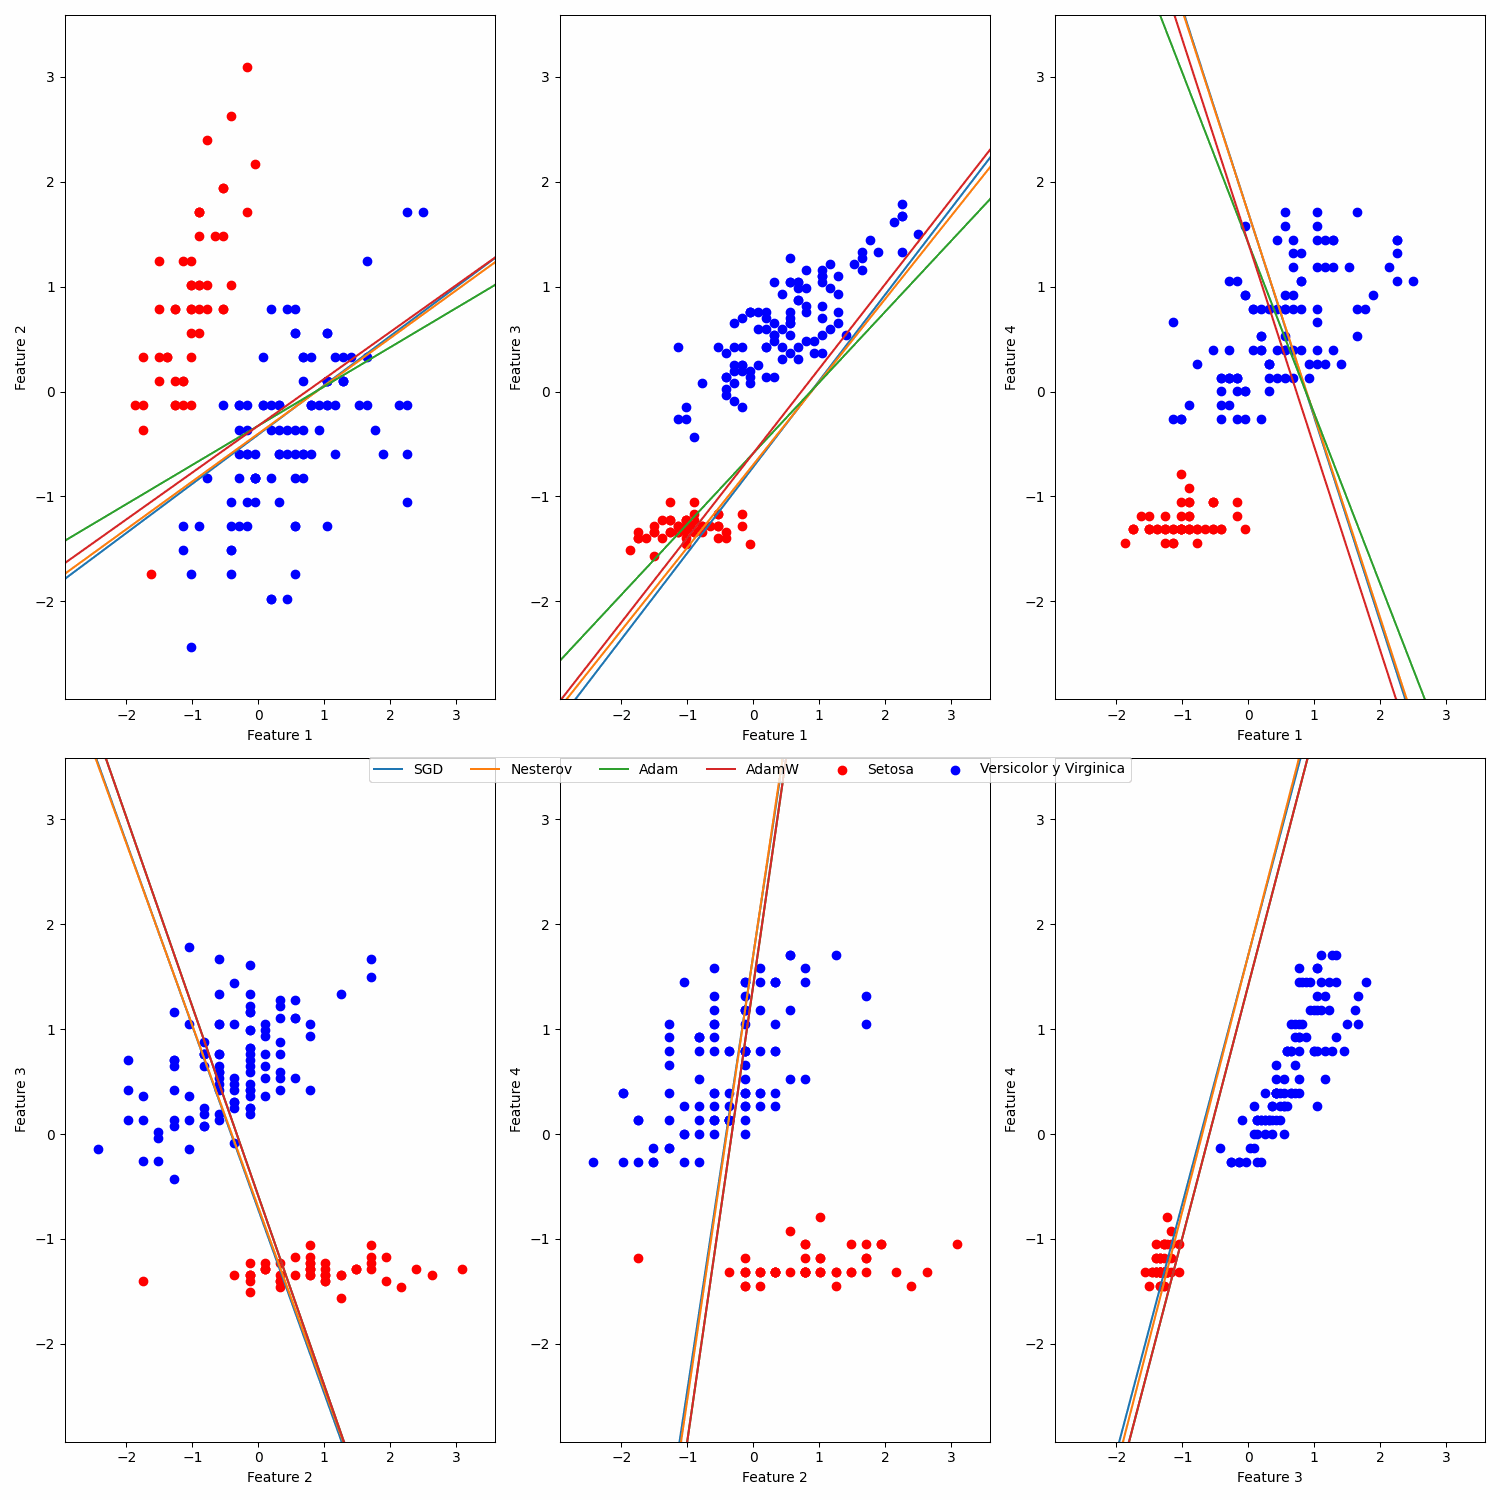

Al graficar las trayectorias de los parametros, se observa una convergencia muy lenta.

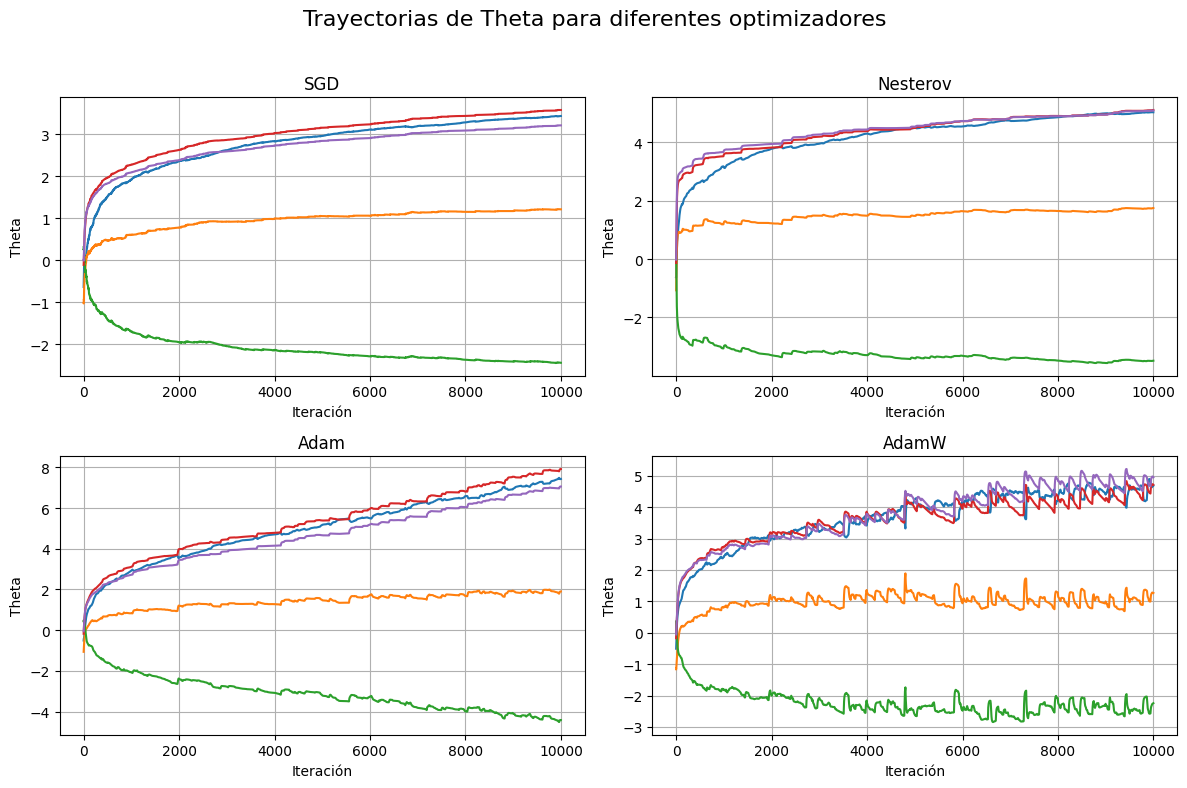

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Trayectorias de Theta para diferentes optimizadores', fontsize=16)

for idx, (name, traj) in enumerate(trajectories.items()):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(traj)
    ax.set_xlabel('Iteración')
    ax.set_ylabel('Theta')
    ax.set_title(name)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

# Minimos cuadrados

In [3]:
def grad_quadratic(theta, f_params):
    '''
    Gradiente de la función de costo cuadrático (MSE)
           J(theta) = (1/2m) * sum_i (theta@x[i] - y[i])**2
    '''    
    X = f_params['X']
    y = f_params['y']
    m = len(y)

    h_theta = X @ theta

    err = h_theta - y

    gradient = (X.T @ err) / m

    return gradient

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

#y[y==1] = 0
y[y==2] = 1


X = StandardScaler().fit_transform(X)
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [8]:
import numpy as np

# Definir los optimizadores
optimizers = {
    'SGD': SGD,
    'Nesterov': stochastic_NAG,
    'Adam': stochastic_ADAM,
    'AdamW': stochastic_ADAMW
}

# Parámetros para el algoritmo
gd_params = {'alpha'          : 0.01,
             'alphaADAM'      : 0.01,
             'nIter'          : 5000,
             'batch_size'     : 32,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999,
             'decay'          : 0.01}

# Parámetros para la función objetivo
f_params = {'kappa' : 0.01, 
            'X'     : X, 
            'y'     : y}

theta0 = np.random.randn(X.shape[1])
trajectories = {}
for name in optimizers:
    trajectories[name] = optimizers[name](theta=theta0, grad=grad_quadratic, gd_params=gd_params, f_params=f_params)

Al usar el gradiente de la funcion de costo cuadratico, se observa una convergencia bastante rapida y sin grandes variaciones en la trayectoria de los parametros.

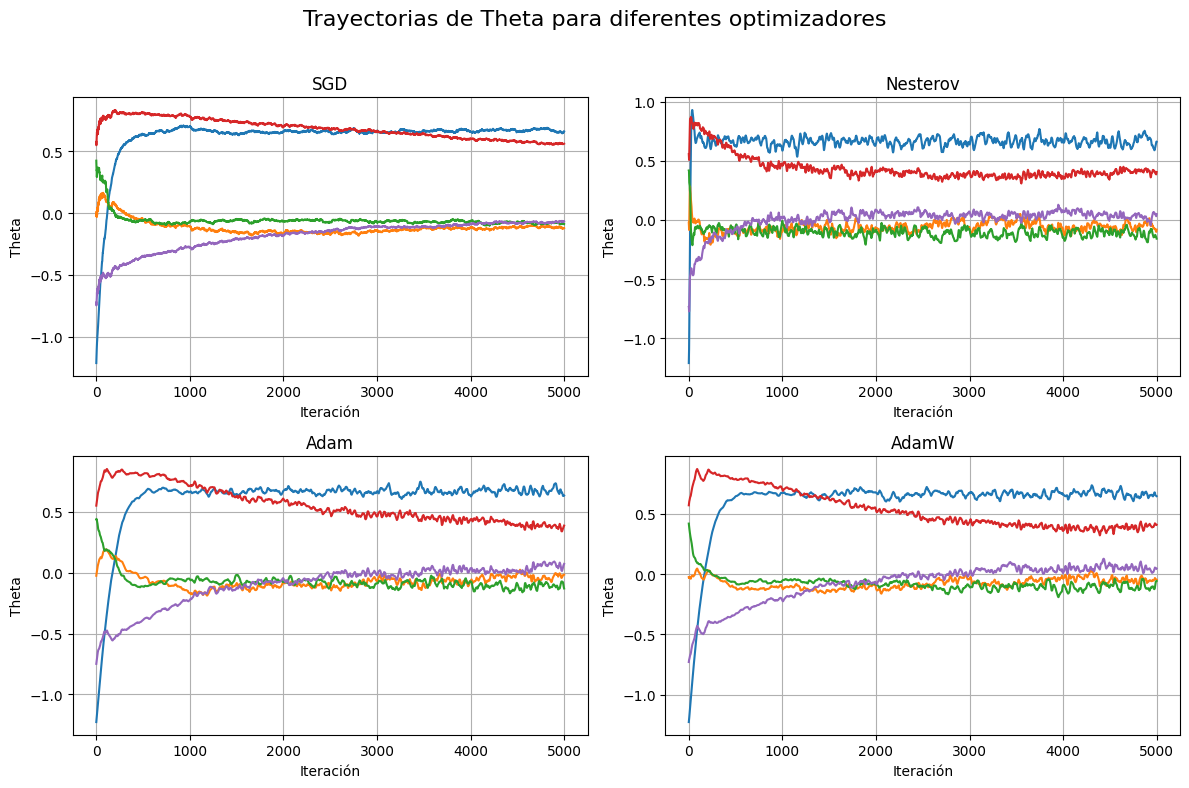

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Trayectorias de Theta para diferentes optimizadores', fontsize=16)

for idx, (name, traj) in enumerate(trajectories.items()):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(traj)
    ax.set_xlabel('Iteración')
    ax.set_ylabel('Theta')
    ax.set_title(name)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()